In [3]:
pip install biosppy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.2/142.2 kB 1.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


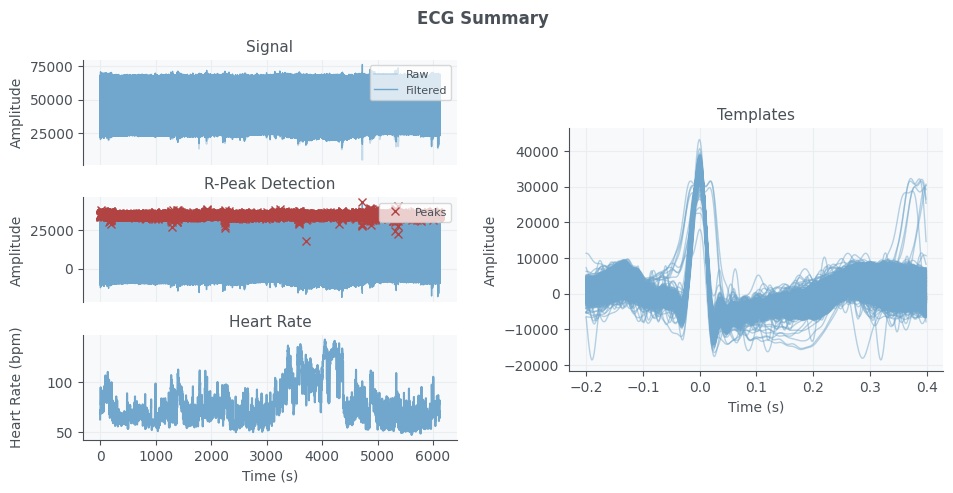

Detected RR Intervals S17: [0.691 0.627 0.562 0.582 0.597 0.602 0.607 0.645 0.562 0.543 0.506 0.475
 0.449 0.442 0.438 0.465 0.492 0.536 0.55  0.546 0.514 0.506 0.488 0.506
 0.508 0.504 0.524 0.518 0.497 0.489 0.509 0.519 0.566 0.522 0.482 0.465
 0.48  0.476 0.46  0.457 0.456 0.473 0.464 0.459 0.456 0.486 0.494 0.466
 0.469 0.471 0.498 0.504 0.504 0.567 0.613 0.582 0.606 0.612 0.605 0.575
 0.524 0.504 0.528 0.603 0.549 0.512 0.472 0.448 0.461 0.479 0.454 0.47
 0.511 0.554 0.551 0.592 0.606 0.583 0.592 0.617 0.586 0.551 0.573 0.63
 0.566 0.493 0.475 0.479 0.564 0.574 0.546 0.522 0.55  0.519 0.501 0.486
 0.46  0.446 0.435 0.436 0.441 0.441 0.449 0.458 0.447 0.437 0.441 0.466
 0.479 0.469 0.47  0.474 0.467 0.459 0.471 0.477 0.453 0.444 0.447 0.452
 0.436 0.442 0.448 0.446 0.449 0.461 0.476 0.507 0.519 0.476 0.456 0.433
 0.415 0.4   0.392 0.389 0.404 0.453 0.466 0.482 0.46  0.456 0.465 0.492
 0.458 0.442 0.441 0.431 0.425 0.416 0.408 0.403 0.41  0.415 0.411 0.412
 0.424 0.439 0.447 0.442 0

In [27]:
import numpy as np
from biosppy.signals import ecg

def get_rr_intervals(sampling_rate):
  with open("/content/drive/MyDrive/DATASET-WESAD/S17_respiban.txt", "r") as file:
    lines = file.readlines()

  header_end = lines.index("# EndOfHeader\n")
  data_lines = lines[header_end + 1:]

  ecg_data = []
  for line in data_lines:
    values = line.strip().split("\t")
    ecg_value = int(values[2])
    ecg_data.append(ecg_value)

  out = ecg.ecg(signal=ecg_data, sampling_rate=sampling_rate)
  rpeaks_indices = out["rpeaks"]

  rr_intervals = np.diff(rpeaks_indices) / 1000

  return rr_intervals

rr_intervals = get_rr_intervals(sampling_rate=700)

np.set_printoptions(threshold=np.inf)

num = "S17"
print(f"Detected RR Intervals {num}:", rr_intervals)